### Importing the Libraries

In [1]:
from PyPDF2 import PdfReader
import numpy as np
import pandas as pd

### Reading the PFD file

In [2]:
reader = PdfReader("Response.pdf")
number_of_pages = len(reader.pages)
page = reader.pages[0]
text = page.extract_text()
texts = np.array(text.split('?'))
print(texts)

['Timestamp Which part of Math is terrifying for you'
 ' Do you feel that unavailability of good Math teacher is a reason behind your fear of math'
 '  Do you get frustrated or frightened when you fail to solve problems repeatedly'
 ' Do you feel rote learning of mathematics increase Math phobia'
 ' Do you have Dyscalculia'
 ' Do you think psychological disorder is one of the reasons behind Math phobia'
 ' Do you think lack of concentration is one of the reasons behind your fear of math'
 ' Do you think unclear concepts of the topics are the reasons behind Math phobia'
 ' Do you think Yoga can solve the Math phobia'
 ' Do you think Math phobia is caused due to the pressure of performing well'
 ' Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world'
 ' Do you agree that regular practice of Mathematics can solve the problems related to Math phobia'
 ' Does breaking up a complicated problem into smaller part help in betterment'
 ' Does 

In [3]:
type(texts)

numpy.ndarray

In [4]:
print(texts.shape)

(16,)


### Cleaning the Data

In [5]:
word = "Timestamp "
texts[0] = texts[0].replace(word,"")
print(texts)

['Which part of Math is terrifying for you'
 ' Do you feel that unavailability of good Math teacher is a reason behind your fear of math'
 '  Do you get frustrated or frightened when you fail to solve problems repeatedly'
 ' Do you feel rote learning of mathematics increase Math phobia'
 ' Do you have Dyscalculia'
 ' Do you think psychological disorder is one of the reasons behind Math phobia'
 ' Do you think lack of concentration is one of the reasons behind your fear of math'
 ' Do you think unclear concepts of the topics are the reasons behind Math phobia'
 ' Do you think Yoga can solve the Math phobia'
 ' Do you think Math phobia is caused due to the pressure of performing well'
 ' Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world'
 ' Do you agree that regular practice of Mathematics can solve the problems related to Math phobia'
 ' Does breaking up a complicated problem into smaller part help in betterment'
 ' Does studying i

In [6]:
index = 15
ques = texts[:index]
feedback = texts[index:]
print("Questions =",ques)
print("Feedbacks =",feedback)

Questions = ['Which part of Math is terrifying for you'
 ' Do you feel that unavailability of good Math teacher is a reason behind your fear of math'
 '  Do you get frustrated or frightened when you fail to solve problems repeatedly'
 ' Do you feel rote learning of mathematics increase Math phobia'
 ' Do you have Dyscalculia'
 ' Do you think psychological disorder is one of the reasons behind Math phobia'
 ' Do you think lack of concentration is one of the reasons behind your fear of math'
 ' Do you think unclear concepts of the topics are the reasons behind Math phobia'
 ' Do you think Yoga can solve the Math phobia'
 ' Do you think Math phobia is caused due to the pressure of performing well'
 ' Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world'
 ' Do you agree that regular practice of Mathematics can solve the problems related to Math phobia'
 ' Does breaking up a complicated problem into smaller part help in betterment'
 ' Doe

In [7]:
ques.shape

(15,)

In [8]:
df_col = ques
df_col

array(['Which part of Math is terrifying for you',
       ' Do you feel that unavailability of good Math teacher is a reason behind your fear of math',
       '  Do you get frustrated or frightened when you fail to solve problems repeatedly',
       ' Do you feel rote learning of mathematics increase Math phobia',
       ' Do you have Dyscalculia',
       ' Do you think psychological disorder is one of the reasons behind Math phobia',
       ' Do you think lack of concentration is one of the reasons behind your fear of math',
       ' Do you think unclear concepts of the topics are the reasons behind Math phobia',
       ' Do you think Yoga can solve the Math phobia',
       ' Do you think Math phobia is caused due to the pressure of performing well',
       ' Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world',
       ' Do you agree that regular practice of Mathematics can solve the problems related to Math phobia',
       ' Does 

In [9]:
df_col.shape

(15,)

In [10]:
s_fb = np.char.split(feedback)
feedback = np.concatenate(s_fb)
print(feedback)

['5/13/2023' '12:00:08' 'Arithmetic' ... 'Sometimes' 'Strongly' 'Disagree']


In [11]:
feedback.shape

(3482,)

In [12]:
import re
stu_fbs = feedback.copy()
DP = r"\b\d{2}/\d{2}/\d{4}\b"
TP = r"\b\d{2}:\d{2}:\d{2}\b"
for i in range(len(stu_fbs)):
    stu_fbs[i] = re.sub(DP,"",stu_fbs[i])
    stu_fbs[i] = re.sub(TP,"",stu_fbs[i])

print(stu_fbs)

['5/13/2023' '' 'Arithmetic' ... 'Sometimes' 'Strongly' 'Disagree']


In [13]:
word = "5/13/2023"
stu_fbs[0] = stu_fbs[0].replace(word,"")
print(stu_fbs)

['' '' 'Arithmetic' ... 'Sometimes' 'Strongly' 'Disagree']


In [14]:
index = 15
feedback_ans = texts[index:]
feedback_ans

array(["\n5/13/2023 12:00:08 Arithmetic Strongly Agree Strongly Agree Moderately Agree Not at all Not yet decided Moderately Agree Strongly Agree Strongly Disagree Strongly Agree Moderately Agree Moderately Agree Moderately Agree Sometimes Not yet decided\n5/13/2023 20:10:44 All of the above Strongly Agree Strongly Agree Not yet decided No, I didn't Strongly Agree Strongly Agree Strongly Agree Strongly Disagree Moderately Agree Moderately Agree Strongly Agree Moderately Agree Sometimes Moderately Agree\n5/14/2023 11:19:41 Algebra Strongly Agree Strongly Agree Not yet decided No, I didn't Strongly Disagree Moderately Agree Strongly Agree Not yet decided Moderately Agree Moderately Agree Strongly Agree Moderately Agree Sometimes Moderately Agree\n5/14/2023 11:27:17 Trigonometry Strongly Agree Not yet decided Moderately Disagree None of the above Moderately Agree Moderately Agree Strongly Agree Not yet decided Moderately Disagree Strongly Agree Strongly Agree Strongly Agree Yes Moderately

In [15]:
feedback_ans
words_to_keep = ["Arithmetic","All of the above","Algebra","Trigonometry","Geometry","Moderately Agree","Strongly Agree","Not yet decided","Strongly disagree","Strongly Disagree","Moderately Disagree","Not at all","Some times","No, I didn't","Yes, I suffered","None of the above","Sometimes","Yes","never"]
#words_to_keep = [word.lower() for word in words_to_keep]
join_arr = ' '.join(feedback_ans)
for phrase in words_to_keep:
    if ' ' in phrase:
        join_arr = join_arr.replace(phrase,phrase.replace(' ','_'))

spl_arr = join_arr.split()

fil_arr = [word for word in spl_arr if word in words_to_keep or word.replace('_', ' ') in words_to_keep]

fil_arr = [word.replace('_', ' ') for word in fil_arr]

print(fil_arr)

['Arithmetic', 'Strongly Agree', 'Strongly Agree', 'Moderately Agree', 'Not at all', 'Not yet decided', 'Moderately Agree', 'Strongly Agree', 'Strongly Disagree', 'Strongly Agree', 'Moderately Agree', 'Moderately Agree', 'Moderately Agree', 'Sometimes', 'Not yet decided', 'All of the above', 'Strongly Agree', 'Strongly Agree', 'Not yet decided', "No, I didn't", 'Strongly Agree', 'Strongly Agree', 'Strongly Agree', 'Strongly Disagree', 'Moderately Agree', 'Moderately Agree', 'Strongly Agree', 'Moderately Agree', 'Sometimes', 'Moderately Agree', 'Algebra', 'Strongly Agree', 'Strongly Agree', 'Not yet decided', "No, I didn't", 'Strongly Disagree', 'Moderately Agree', 'Strongly Agree', 'Not yet decided', 'Moderately Agree', 'Moderately Agree', 'Strongly Agree', 'Moderately Agree', 'Sometimes', 'Moderately Agree', 'Trigonometry', 'Strongly Agree', 'Not yet decided', 'Moderately Disagree', 'None of the above', 'Moderately Agree', 'Moderately Agree', 'Strongly Agree', 'Not yet decided', 'Mode

In [16]:
fil_arr
specific_word = ["Arithmetic","All of the above","Algebra","Trigonometry","Geometry","Moderately Agree","Strongly Agree","Not yet decided","Strongly disagree","Strongly Disagree","Moderately Disagree","Not at all","Some times","No, I didn't","Yes, I suffered","None of the above","Sometimes","Yes","never"]
nested_arr = [[]]
for word in fil_arr:
    if word in specific_word:
        nested_arr.append([word])
    else:
        nested_arr[-1].append(word)

#nested_arr = np.array(nested_arr)
print(nested_arr)

[[], ['Arithmetic'], ['Strongly Agree'], ['Strongly Agree'], ['Moderately Agree'], ['Not at all'], ['Not yet decided'], ['Moderately Agree'], ['Strongly Agree'], ['Strongly Disagree'], ['Strongly Agree'], ['Moderately Agree'], ['Moderately Agree'], ['Moderately Agree'], ['Sometimes'], ['Not yet decided'], ['All of the above'], ['Strongly Agree'], ['Strongly Agree'], ['Not yet decided'], ["No, I didn't"], ['Strongly Agree'], ['Strongly Agree'], ['Strongly Agree'], ['Strongly Disagree'], ['Moderately Agree'], ['Moderately Agree'], ['Strongly Agree'], ['Moderately Agree'], ['Sometimes'], ['Moderately Agree'], ['Algebra'], ['Strongly Agree'], ['Strongly Agree'], ['Not yet decided'], ["No, I didn't"], ['Strongly Disagree'], ['Moderately Agree'], ['Strongly Agree'], ['Not yet decided'], ['Moderately Agree'], ['Moderately Agree'], ['Strongly Agree'], ['Moderately Agree'], ['Sometimes'], ['Moderately Agree'], ['Trigonometry'], ['Strongly Agree'], ['Not yet decided'], ['Moderately Disagree'], [

In [17]:
nested_arr = [lst for lst in nested_arr if lst]
print(nested_arr)

[['Arithmetic'], ['Strongly Agree'], ['Strongly Agree'], ['Moderately Agree'], ['Not at all'], ['Not yet decided'], ['Moderately Agree'], ['Strongly Agree'], ['Strongly Disagree'], ['Strongly Agree'], ['Moderately Agree'], ['Moderately Agree'], ['Moderately Agree'], ['Sometimes'], ['Not yet decided'], ['All of the above'], ['Strongly Agree'], ['Strongly Agree'], ['Not yet decided'], ["No, I didn't"], ['Strongly Agree'], ['Strongly Agree'], ['Strongly Agree'], ['Strongly Disagree'], ['Moderately Agree'], ['Moderately Agree'], ['Strongly Agree'], ['Moderately Agree'], ['Sometimes'], ['Moderately Agree'], ['Algebra'], ['Strongly Agree'], ['Strongly Agree'], ['Not yet decided'], ["No, I didn't"], ['Strongly Disagree'], ['Moderately Agree'], ['Strongly Agree'], ['Not yet decided'], ['Moderately Agree'], ['Moderately Agree'], ['Strongly Agree'], ['Moderately Agree'], ['Sometimes'], ['Moderately Agree'], ['Trigonometry'], ['Strongly Agree'], ['Not yet decided'], ['Moderately Disagree'], ['Non

In [18]:
# Words to start a new list
start_words = ["Arithmetic", "Algebra", "Geometry", "Trigonometry","All of the above"]

# Initialize an empty list to hold your nested lists
nested_list = []
# Initialize an empty list to hold the current sublist
sublist = []

# Iterate over each list in the current list
for lst in nested_arr:
    # If the first element of the list is a start word, start a new sublist
    if lst[0] in start_words:
        # If the current sublist is not empty, add it to the nested list
        if sublist:
            nested_list.append(sublist)
        # Start a new sublist with the current list
        sublist = lst
    else:
        # If the first element of the list is not a start word, add the list to the current sublist
        sublist += lst

# Add the last sublist to the nested list
if sublist:
    nested_list.append(sublist)

print(nested_list)


[['Arithmetic', 'Strongly Agree', 'Strongly Agree', 'Moderately Agree', 'Not at all', 'Not yet decided', 'Moderately Agree', 'Strongly Agree', 'Strongly Disagree', 'Strongly Agree', 'Moderately Agree', 'Moderately Agree', 'Moderately Agree', 'Sometimes', 'Not yet decided'], ['All of the above', 'Strongly Agree', 'Strongly Agree', 'Not yet decided', "No, I didn't", 'Strongly Agree', 'Strongly Agree', 'Strongly Agree', 'Strongly Disagree', 'Moderately Agree', 'Moderately Agree', 'Strongly Agree', 'Moderately Agree', 'Sometimes', 'Moderately Agree'], ['Algebra', 'Strongly Agree', 'Strongly Agree', 'Not yet decided', "No, I didn't", 'Strongly Disagree', 'Moderately Agree', 'Strongly Agree', 'Not yet decided', 'Moderately Agree', 'Moderately Agree', 'Strongly Agree', 'Moderately Agree', 'Sometimes', 'Moderately Agree'], ['Trigonometry', 'Strongly Agree', 'Not yet decided', 'Moderately Disagree', 'None of the above', 'Moderately Agree', 'Moderately Agree', 'Strongly Agree', 'Not yet decided'

In [19]:
type(nested_list)

list

In [20]:
# Assuming 'nested_list' is your list
num_rows = len(nested_list)
num_cols = len(nested_list[0]) if nested_list else 0  # Check if the list is not empty

print("Number of rows (sublists):", num_rows)
print("Number of columns (elements in a sublist):", num_cols)


Number of rows (sublists): 106
Number of columns (elements in a sublist): 15


### Converting into Data Frame

In [21]:
df_row = pd.DataFrame(nested_list)

In [22]:
df_row

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Arithmetic,Strongly Agree,Strongly Agree,Moderately Agree,Not at all,Not yet decided,Moderately Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Moderately Agree,Moderately Agree,Moderately Agree,Sometimes,Not yet decided
1,All of the above,Strongly Agree,Strongly Agree,Not yet decided,"No, I didn't",Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree
2,Algebra,Strongly Agree,Strongly Agree,Not yet decided,"No, I didn't",Strongly Disagree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree
3,Trigonometry,Strongly Agree,Not yet decided,Moderately Disagree,None of the above,Moderately Agree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,Moderately Agree
4,All of the above,Moderately Disagree,Strongly Agree,Not yet decided,"Yes, I suffered",Moderately Agree,Moderately Disagree,Moderately Agree,Not yet decided,Moderately Disagree,Strongly Disagree,Moderately Disagree,Not yet decided,Yes,Moderately Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Algebra,Moderately Agree,Strongly Agree,Not yet decided,Not at all,Not yet decided,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Moderately Agree,Sometimes,None
102,Trigonometry,Moderately Agree,Not yet decided,Some times,Strongly Agree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Agree,Strongly Agree,Strongly Agree,Moderately Agree,Sometimes,None,None
103,Arithmetic,Not yet decided,Moderately Agree,Not yet decided,Not at all,Moderately Disagree,Moderately Agree,Moderately Agree,Moderately Agree,Moderately Agree,Not yet decided,Strongly Agree,Not yet decided,Sometimes,Moderately Agree
104,Geometry,Strongly Agree,Moderately Agree,Not yet decided,Not at all,Moderately Disagree,Moderately Agree,Moderately Agree,Not yet decided,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,None


In [23]:
df_col

array(['Which part of Math is terrifying for you',
       ' Do you feel that unavailability of good Math teacher is a reason behind your fear of math',
       '  Do you get frustrated or frightened when you fail to solve problems repeatedly',
       ' Do you feel rote learning of mathematics increase Math phobia',
       ' Do you have Dyscalculia',
       ' Do you think psychological disorder is one of the reasons behind Math phobia',
       ' Do you think lack of concentration is one of the reasons behind your fear of math',
       ' Do you think unclear concepts of the topics are the reasons behind Math phobia',
       ' Do you think Yoga can solve the Math phobia',
       ' Do you think Math phobia is caused due to the pressure of performing well',
       ' Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world',
       ' Do you agree that regular practice of Mathematics can solve the problems related to Math phobia',
       ' Does 

In [24]:
col_df = pd.DataFrame(df_col.reshape(1,-1))
print(col_df)

                                         0   \
0  Which part of Math is terrifying for you   

                                                  1   \
0   Do you feel that unavailability of good Math ...   

                                                  2   \
0    Do you get frustrated or frightened when you...   

                                                  3   \
0   Do you feel rote learning of mathematics incr...   

                         4   \
0   Do you have Dyscalculia   

                                                  5   \
0   Do you think psychological disorder is one of...   

                                                  6   \
0   Do you think lack of concentration is one of ...   

                                                  7   \
0   Do you think unclear concepts of the topics a...   

                                             8   \
0   Do you think Yoga can solve the Math phobia   

                                                  9   \
0   D

In [25]:
col_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Which part of Math is terrifying for you,Do you feel that unavailability of good Math ...,Do you get frustrated or frightened when you...,Do you feel rote learning of mathematics incr...,Do you have Dyscalculia,Do you think psychological disorder is one of...,Do you think lack of concentration is one of ...,Do you think unclear concepts of the topics a...,Do you think Yoga can solve the Math phobia,Do you think Math phobia is caused due to the...,Do you feel Mathematics phobia arises because...,Do you agree that regular practice of Mathema...,Does breaking up a complicated problem into s...,Does studying in peer groups and seeking help...,Does frequent mock tests help to release the ...


In [26]:
merge_df = pd.concat([col_df,df_row],ignore_index=True)
merge_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Which part of Math is terrifying for you,Do you feel that unavailability of good Math ...,Do you get frustrated or frightened when you...,Do you feel rote learning of mathematics incr...,Do you have Dyscalculia,Do you think psychological disorder is one of...,Do you think lack of concentration is one of ...,Do you think unclear concepts of the topics a...,Do you think Yoga can solve the Math phobia,Do you think Math phobia is caused due to the...,Do you feel Mathematics phobia arises because...,Do you agree that regular practice of Mathema...,Does breaking up a complicated problem into s...,Does studying in peer groups and seeking help...,Does frequent mock tests help to release the ...
1,Arithmetic,Strongly Agree,Strongly Agree,Moderately Agree,Not at all,Not yet decided,Moderately Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Moderately Agree,Moderately Agree,Moderately Agree,Sometimes,Not yet decided
2,All of the above,Strongly Agree,Strongly Agree,Not yet decided,"No, I didn't",Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree
3,Algebra,Strongly Agree,Strongly Agree,Not yet decided,"No, I didn't",Strongly Disagree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree
4,Trigonometry,Strongly Agree,Not yet decided,Moderately Disagree,None of the above,Moderately Agree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,Moderately Agree


In [27]:
merge_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Which part of Math is terrifying for you,Do you feel that unavailability of good Math ...,Do you get frustrated or frightened when you...,Do you feel rote learning of mathematics incr...,Do you have Dyscalculia,Do you think psychological disorder is one of...,Do you think lack of concentration is one of ...,Do you think unclear concepts of the topics a...,Do you think Yoga can solve the Math phobia,Do you think Math phobia is caused due to the...,Do you feel Mathematics phobia arises because...,Do you agree that regular practice of Mathema...,Does breaking up a complicated problem into s...,Does studying in peer groups and seeking help...,Does frequent mock tests help to release the ...
1,Arithmetic,Strongly Agree,Strongly Agree,Moderately Agree,Not at all,Not yet decided,Moderately Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Moderately Agree,Moderately Agree,Moderately Agree,Sometimes,Not yet decided
2,All of the above,Strongly Agree,Strongly Agree,Not yet decided,"No, I didn't",Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree
3,Algebra,Strongly Agree,Strongly Agree,Not yet decided,"No, I didn't",Strongly Disagree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree
4,Trigonometry,Strongly Agree,Not yet decided,Moderately Disagree,None of the above,Moderately Agree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,Moderately Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Algebra,Moderately Agree,Strongly Agree,Not yet decided,Not at all,Not yet decided,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Moderately Agree,Sometimes,None
103,Trigonometry,Moderately Agree,Not yet decided,Some times,Strongly Agree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Agree,Strongly Agree,Strongly Agree,Moderately Agree,Sometimes,None,None
104,Arithmetic,Not yet decided,Moderately Agree,Not yet decided,Not at all,Moderately Disagree,Moderately Agree,Moderately Agree,Moderately Agree,Moderately Agree,Not yet decided,Strongly Agree,Not yet decided,Sometimes,Moderately Agree
105,Geometry,Strongly Agree,Moderately Agree,Not yet decided,Not at all,Moderately Disagree,Moderately Agree,Moderately Agree,Not yet decided,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,None


In [28]:
merge_df.columns = merge_df.iloc[0]
merge_df = merge_df[1:]
merge_df = merge_df.reset_index(drop=True)
final_df = merge_df

In [29]:
final_df

,Which part of Math is terrifying for you,Do you feel that unavailability of good Math teacher is a reason behind your fear of math,Do you get frustrated or frightened when you fail to solve problems repeatedly,Do you feel rote learning of mathematics increase Math phobia,Do you have Dyscalculia,Do you think psychological disorder is one of the reasons behind Math phobia,Do you think lack of concentration is one of the reasons behind your fear of math,Do you think unclear concepts of the topics are the reasons behind Math phobia,Do you think Yoga can solve the Math phobia,Do you think Math phobia is caused due to the pressure of performing well,Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world,Do you agree that regular practice of Mathematics can solve the problems related to Math phobia,Does breaking up a complicated problem into smaller part help in betterment,Does studying in peer groups and seeking help from teacher help to eradicate Math phobia,Does frequent mock tests help to release the pressure
0,Arithmetic,Strongly Agree,Strongly Agree,Moderately Agree,Not at all,Not yet decided,Moderately Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Moderately Agree,Moderately Agree,Moderately Agree,Sometimes,Not yet decided
1,All of the above,Strongly Agree,Strongly Agree,Not yet decided,"No, I didn't",Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree
2,Algebra,Strongly Agree,Strongly Agree,Not yet decided,"No, I didn't",Strongly Disagree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Agree,Moderately Agree,Strongly Agree,Moderately Agree,Sometimes,Moderately Agree
3,Trigonometry,Strongly Agree,Not yet decided,Moderately Disagree,None of the above,Moderately Agree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,Moderately Agree
4,All of the above,Moderately Disagree,Strongly Agree,Not yet decided,"Yes, I suffered",Moderately Agree,Moderately Disagree,Moderately Agree,Not yet decided,Moderately Disagree,Strongly Disagree,Moderately Disagree,Not yet decided,Yes,Moderately Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Algebra,Moderately Agree,Strongly Agree,Not yet decided,Not at all,Not yet decided,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Moderately Agree,Sometimes,None
102,Trigonometry,Moderately Agree,Not yet decided,Some times,Strongly Agree,Moderately Agree,Strongly Agree,Not yet decided,Moderately Agree,Strongly Agree,Strongly Agree,Moderately Agree,Sometimes,None,None
103,Arithmetic,Not yet decided,Moderately Agree,Not yet decided,Not at all,Moderately Disagree,Moderately Agree,Moderately Agree,Moderately Agree,Moderately Agree,Not yet decided,Strongly Agree,Not yet decided,Sometimes,Moderately Agree
104,Geometry,Strongly Agree,Moderately Agree,Not yet decided,Not at all,Moderately Disagree,Moderately Agree,Moderately Agree,Not yet decided,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,None


### Applying Sentiment Analysis

In [30]:
final_df['Which part of Math is terrifying for you'].value_counts().sort_index()

Which part of Math is terrifying for you
Algebra             23
All of the above    24
Arithmetic          17
Geometry            23
Trigonometry        19
Name: count, dtype: int64

In [31]:
from textblob import TextBlob

opt1 = TextBlob("Algebra")
opt2 = TextBlob("All of the above")
opt3 = TextBlob("Arithmetic")
opt4 = TextBlob("Geometry")
opt5 = TextBlob("Trigonometry")

print(opt1.sentiment)
print(opt2.sentiment)
print(opt3.sentiment)
print(opt4.sentiment)
print(opt5.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


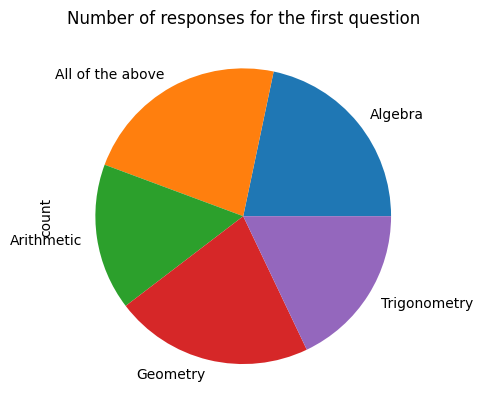

In [32]:
plot1 = final_df['Which part of Math is terrifying for you'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the first question')

In [33]:
final_df[' Do you feel that unavailability of good Math teacher is a reason behind your fear of math'].value_counts().sort_index()

 Do you feel that unavailability of good Math teacher is a reason behind your fear of math
Moderately Agree       20
Moderately Disagree    11
Not yet decided         6
Strongly Agree         51
Strongly disagree      18
Name: count, dtype: int64

In [34]:
from textblob import TextBlob

opt1 = TextBlob("Moderately Agree")
opt2 = TextBlob("Moderately Disagree")
opt3 = TextBlob("Not yet decided")
opt4 = TextBlob("Strongly Agree")
opt5 = TextBlob("Strongly disagree")

print(opt1.sentiment)
print(opt2.sentiment)
print(opt3.sentiment)
print(opt4.sentiment)
print(opt5.sentiment)

Sentiment(polarity=0.0, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4333333333333333, subjectivity=0.7333333333333333)
Sentiment(polarity=0.4333333333333333, subjectivity=0.7333333333333333)


In [35]:
sen_ana_feed2 = final_df[' Do you feel that unavailability of good Math teacher is a reason behind your fear of math']
feedback_count = final_df[' Do you feel that unavailability of good Math teacher is a reason behind your fear of math'].value_counts()
sentiment_scores = {
    "Strongly Agree": 2,
    "Moderately Agree": 1,
    "Not yet decided": 0,
    "Moderately Disagree": -1,
    "Strongly disagree": -2
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed2.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print(" Do you feel that unavailability of good Math teacher is a reason behind your fear of math")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Do you feel that unavailability of good Math teacher is a reason behind your fear of math
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0       Strongly Agree     51                2               0.962264
1     Moderately Agree     20                1               0.188679
2    Strongly disagree     18               -2              -0.339623
3  Moderately Disagree     11               -1              -0.103774
4      Not yet decided      6                0               0.000000
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 0.7075471698113207


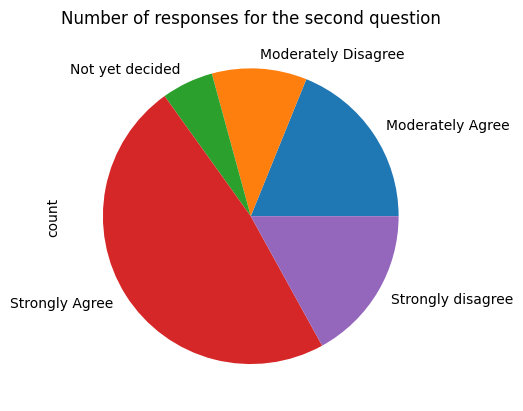

In [36]:
plot2 = final_df[' Do you feel that unavailability of good Math teacher is a reason behind your fear of math'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the second question')

In [37]:
final_df['  Do you get frustrated or frightened when you fail to solve problems repeatedly'].value_counts().sort_index()

  Do you get frustrated or frightened when you fail to solve problems repeatedly
Moderately Agree       29
Moderately Disagree     6
Not yet decided         9
Strongly Agree         59
Strongly Disagree       3
Name: count, dtype: int64

In [38]:
sen_ana_feed3 = final_df['  Do you get frustrated or frightened when you fail to solve problems repeatedly']
feedback_count = final_df['  Do you get frustrated or frightened when you fail to solve problems repeatedly'].value_counts()
sentiment_scores = {
    "Strongly Agree": 2,
    "Moderately Agree": 1,
    "Not yet decided": 0,
    "Moderately Disagree": -1,
    "Strongly Disagree": -2
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed3.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print("Do you get frustrated or frightened when you fail to solve problems repeatedly")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

Do you get frustrated or frightened when you fail to solve problems repeatedly
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0       Strongly Agree     59                2               1.113208
1     Moderately Agree     29                1               0.273585
2      Not yet decided      9                0               0.000000
3  Moderately Disagree      6               -1              -0.056604
4    Strongly Disagree      3               -2              -0.056604
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 1.2735849056603774


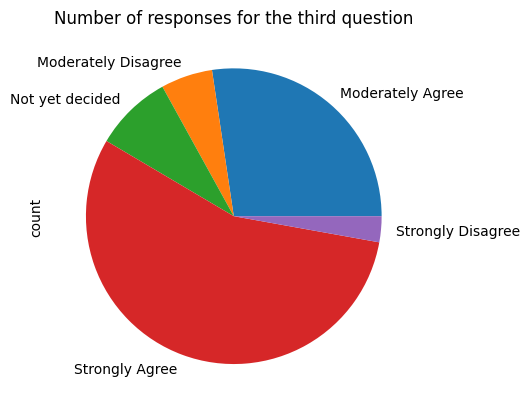

In [39]:
plot3 = final_df['  Do you get frustrated or frightened when you fail to solve problems repeatedly'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the third question')

In [40]:
final_df[' Do you feel rote learning of mathematics increase Math phobia'].value_counts().sort_index()

 Do you feel rote learning of mathematics increase Math phobia
Moderately Agree       20
Moderately Disagree     7
No, I didn't            3
Not at all              6
Not yet decided        22
Some times              2
Strongly Agree         35
Strongly Disagree      11
Name: count, dtype: int64

In [41]:
opt1 = TextBlob("No, I didn't")
opt2 = TextBlob("Not at all")
opt3 = TextBlob("Some times")
print(opt1.sentiment)
print(opt2.sentiment)
print(opt3.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


In [42]:
sen_ana_feed4 = final_df[' Do you feel rote learning of mathematics increase Math phobia']
feedback_count = final_df[' Do you feel rote learning of mathematics increase Math phobia'].value_counts()
sentiment_scores = {
    "Strongly Agree": 3,
    "Moderately Agree": 2,
    "Not yet decided": 0,
    "Moderately Disagree": -2,
    "Strongly Disagree": -3,
    "No, I didn't": 0.5,
    "Not at all": -1,
    "Some times": 1
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed4.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print(" Do you feel rote learning of mathematics increase Math phobia")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Do you feel rote learning of mathematics increase Math phobia
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0       Strongly Agree     35              3.0               0.990566
1      Not yet decided     22              0.0               0.000000
2     Moderately Agree     20              2.0               0.377358
3    Strongly Disagree     11             -3.0              -0.311321
4  Moderately Disagree      7             -2.0              -0.132075
5           Not at all      6             -1.0              -0.056604
6         No, I didn't      3              0.5               0.014151
7           Some times      2              1.0               0.018868
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 0.9009433962264151


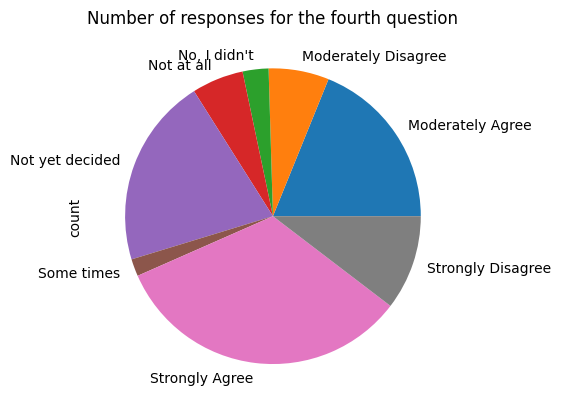

In [43]:
plot4 = final_df[' Do you feel rote learning of mathematics increase Math phobia'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the fourth question')

In [44]:
final_df[' Do you have Dyscalculia'].value_counts().sort_index()

 Do you have Dyscalculia
Moderately Agree      1
No, I didn't         28
None of the above     8
Not at all           29
Not yet decided       5
Some times           19
Strongly Agree        5
Yes, I suffered      11
Name: count, dtype: int64

In [45]:
sen_ana_feed5 = final_df[' Do you have Dyscalculia']
feedback_count = final_df[' Do you have Dyscalculia'].value_counts()
sentiment_scores = {
    "Strongly Agree": 3,
    "Moderately Agree": 2,
    "Not yet decided": 0,
    "Moderately Disagree": -2,
    "Strongly disagree": -3,
    "No, I didn't": 0.5,
    "None of the above": 0,
    "Not at all": -1,
    "Some times": 1,
    "Yes, I suffered": -0.5
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed5.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print(" Do you have Dyscalculia")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Do you have Dyscalculia
----------------------------------------------------------------------------------------------------------------------
            feedback  count  sentiment_score  total_sentiment_score
0         Not at all     29             -1.0              -0.273585
1       No, I didn't     28              0.5               0.132075
2         Some times     19              1.0               0.179245
3    Yes, I suffered     11             -0.5              -0.051887
4  None of the above      8              0.0               0.000000
5    Not yet decided      5              0.0               0.000000
6     Strongly Agree      5              3.0               0.141509
7   Moderately Agree      1              2.0               0.018868
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 0.14622641509433962


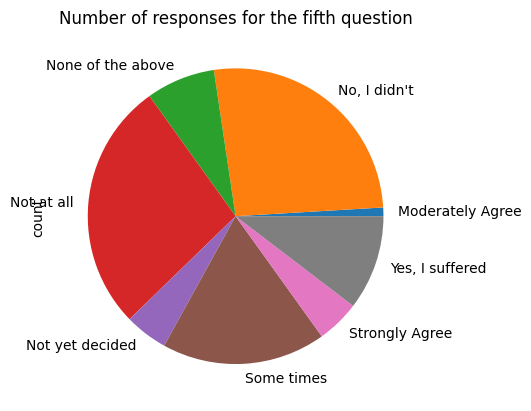

In [46]:
plot5 = final_df[' Do you have Dyscalculia'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the fifth question')

In [47]:
final_df[' Do you think psychological disorder is one of the reasons behind Math phobia'].value_counts().sort_index()

 Do you think psychological disorder is one of the reasons behind Math phobia
Moderately Agree       24
Moderately Disagree    16
Not yet decided        19
Strongly Agree         27
Strongly Disagree      20
Name: count, dtype: int64

In [48]:
sen_ana_feed6 = final_df[' Do you think psychological disorder is one of the reasons behind Math phobia']
feedback_count = final_df[' Do you think psychological disorder is one of the reasons behind Math phobia'].value_counts()
sentiment_scores = {
    "Strongly Agree": 2,
    "Moderately Agree": 1,
    "Not yet decided": 0,
    "Moderately Disagree": -1,
    "Strongly Disagree": -2
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed6.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print(" Do you think psychological disorder is one of the reason behind Math phobia")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Do you think psychological disorder is one of the reason behind Math phobia
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0       Strongly Agree     27                2               0.509434
1     Moderately Agree     24                1               0.226415
2    Strongly Disagree     20               -2              -0.377358
3      Not yet decided     19                0               0.000000
4  Moderately Disagree     16               -1              -0.150943
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 0.20754716981132076


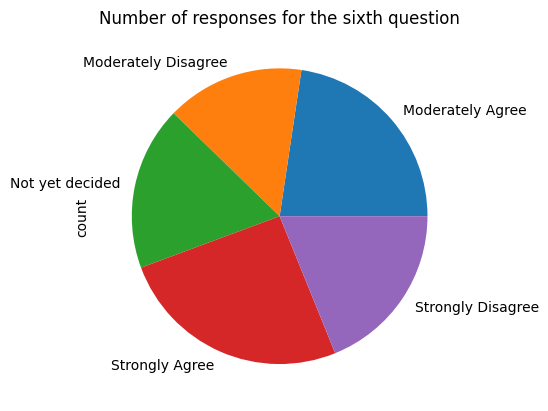

In [49]:
plot6 = final_df[' Do you think psychological disorder is one of the reasons behind Math phobia'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the sixth question')

In [50]:
final_df[' Do you think lack of concentration is one of the reasons behind your fear of math'].value_counts().sort_index()

 Do you think lack of concentration is one of the reasons behind your fear of math
Moderately Agree       33
Moderately Disagree     6
Not yet decided         6
Strongly Agree         50
Strongly Disagree      11
Name: count, dtype: int64

In [51]:
sen_ana_feed7 = final_df[' Do you think lack of concentration is one of the reasons behind your fear of math']
feedback_count = final_df[' Do you think lack of concentration is one of the reasons behind your fear of math'].value_counts()
sentiment_scores = {
    "Strongly Agree": 2,
    "Moderately Agree": 1,
    "Not yet decided": 0,
    "Moderately Disagree": -1,
    "Strongly Disagree": -2
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed7.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print(" Do you think lack of conventration is one of the reasons behind your fear of math")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Do you think lack of conventration is one of the reasons behind your fear of math
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0       Strongly Agree     50                2               0.943396
1     Moderately Agree     33                1               0.311321
2    Strongly Disagree     11               -2              -0.207547
3  Moderately Disagree      6               -1              -0.056604
4      Not yet decided      6                0               0.000000
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 0.9905660377358491


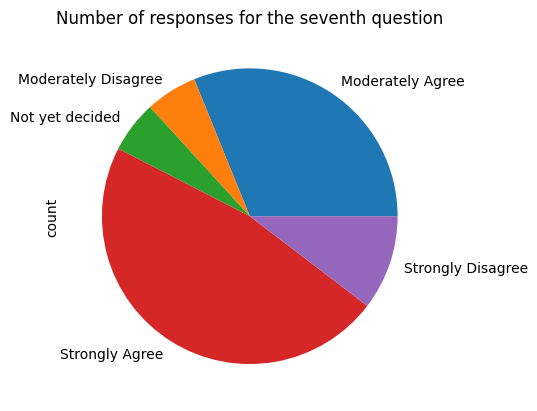

In [52]:
plot7 = final_df[' Do you think lack of concentration is one of the reasons behind your fear of math'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the seventh question')

In [53]:
final_df[' Do you think unclear concepts of the topics are the reasons behind Math phobia'].value_counts().sort_index()

 Do you think unclear concepts of the topics are the reasons behind Math phobia
Moderately Agree       25
Moderately Disagree     5
Not yet decided        10
Strongly Agree         58
Strongly Disagree       8
Name: count, dtype: int64

In [54]:
sen_ana_feed8 = final_df[' Do you think unclear concepts of the topics are the reasons behind Math phobia']
feedback_count = final_df[' Do you think unclear concepts of the topics are the reasons behind Math phobia'].value_counts()
sentiment_scores = {
    "Strongly Agree": 2,
    "Moderately Agree": 1,
    "Not yet decided": 0,
    "Moderately Disagree": -1,
    "Strongly Disagree": -2
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed8.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print(" Do you think unclear concepts of the topics are the reasons behind Math phobia")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Do you think unclear concepts of the topics are the reasons behind Math phobia
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0       Strongly Agree     58                2               1.094340
1     Moderately Agree     25                1               0.235849
2      Not yet decided     10                0               0.000000
3    Strongly Disagree      8               -2              -0.150943
4  Moderately Disagree      5               -1              -0.047170
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 1.1320754716981132


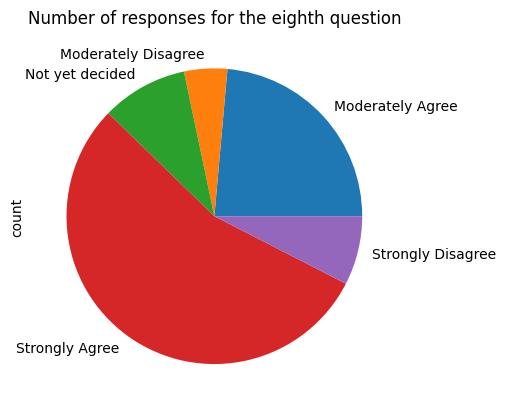

In [55]:
plot8 = final_df[' Do you think unclear concepts of the topics are the reasons behind Math phobia'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the eighth question')

In [56]:
final_df[' Do you think Yoga can solve the Math phobia'].value_counts().sort_index()

 Do you think Yoga can solve the Math phobia
Moderately Agree       30
Moderately Disagree    16
Not yet decided        19
Strongly Agree         19
Strongly Disagree      22
Name: count, dtype: int64

In [57]:
sen_ana_feed9 = final_df[' Do you think Yoga can solve the Math phobia']
feedback_count = final_df[' Do you think Yoga can solve the Math phobia'].value_counts()
sentiment_scores = {
    "Strongly Agree": 2,
    "Moderately Agree": 1,
    "Not yet decided": 0,
    "Moderately Disagree": -1,
    "Strongly Disagree": -2
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed9.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print(" Do you think Yoga can solve the Math phobia")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Do you think Yoga can solve the Math phobia
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0     Moderately Agree     30                1               0.283019
1    Strongly Disagree     22               -2              -0.415094
2      Not yet decided     19                0               0.000000
3       Strongly Agree     19                2               0.358491
4  Moderately Disagree     16               -1              -0.150943
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 0.07547169811320754


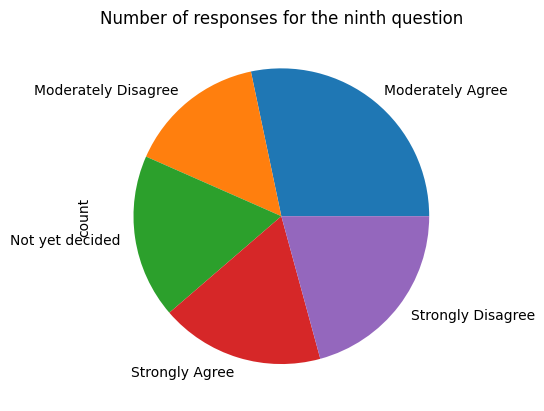

In [58]:
plot9 = final_df[' Do you think Yoga can solve the Math phobia'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the ninth question')

In [59]:
final_df[' Do you think Math phobia is caused due to the pressure of performing well'].value_counts().sort_index()

 Do you think Math phobia is caused due to the pressure of performing well
Moderately Agree       37
Moderately Disagree    18
Not yet decided         7
Strongly Agree         35
Strongly Disagree       9
Name: count, dtype: int64

In [60]:
sen_ana_feed10 = final_df[' Do you think Math phobia is caused due to the pressure of performing well']
feedback_count = final_df[' Do you think Math phobia is caused due to the pressure of performing well'].value_counts()
sentiment_scores = {
    "Strongly Agree": 2,
    "Moderately Agree": 1,
    "Not yet decided": 0,
    "Moderately Disagree": -1,
    "Strongly Disagree": -2
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed10.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print(" Do you think Math phobia is caused due to the presure of performing well")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Do you think Math phobia is caused due to the presure of performing well
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0     Moderately Agree     37                1               0.349057
1       Strongly Agree     35                2               0.660377
2  Moderately Disagree     18               -1              -0.169811
3    Strongly Disagree      9               -2              -0.169811
4      Not yet decided      7                0               0.000000
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 0.6698113207547169


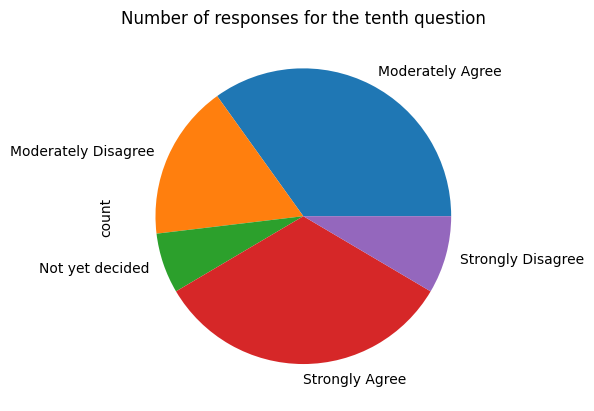

In [61]:
plot10 = final_df[' Do you think Math phobia is caused due to the pressure of performing well'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the tenth question')

In [62]:
final_df[' Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world'].value_counts().sort_index()

 Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world
Moderately Agree       29
Moderately Disagree    11
Not yet decided        11
Strongly Agree         48
Strongly Disagree       7
Name: count, dtype: int64

In [63]:
sen_ana_feed11 = final_df[' Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world']
feedback_count = final_df[' Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world'].value_counts()
sentiment_scores = {
    "Strongly Agree": 2,
    "Moderately Agree": 1,
    "Not yet decided": 0,
    "Moderately Disagree": -1,
    "Strongly Disagree": -2
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed11.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print(" Do you feel that unavailability of good Math teacher is a reason behind your fear of math")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Do you feel that unavailability of good Math teacher is a reason behind your fear of math
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0       Strongly Agree     48                2               0.905660
1     Moderately Agree     29                1               0.273585
2      Not yet decided     11                0               0.000000
3  Moderately Disagree     11               -1              -0.103774
4    Strongly Disagree      7               -2              -0.132075
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 0.9433962264150944


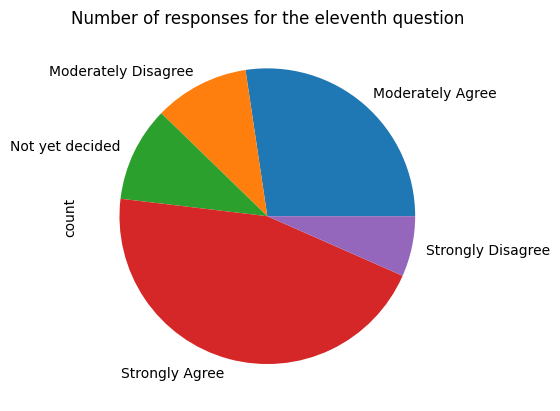

In [64]:
plot11 = final_df[' Do you feel Mathematics phobia arises because you are not able to connect Mathematics with the real world'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the eleventh question')

In [65]:
final_df[' Do you agree that regular practice of Mathematics can solve the problems related to Math phobia'].value_counts().sort_index()

 Do you agree that regular practice of Mathematics can solve the problems related to Math phobia
Moderately Agree       14
Moderately Disagree     6
Not yet decided         6
Strongly Agree         76
Strongly Disagree       4
Name: count, dtype: int64

In [66]:
sen_ana_feed12 = final_df[' Do you agree that regular practice of Mathematics can solve the problems related to Math phobia']
feedback_count = final_df[' Do you agree that regular practice of Mathematics can solve the problems related to Math phobia'].value_counts()
sentiment_scores = {
    "Strongly Agree": 2,
    "Moderately Agree": 1,
    "Not yet decided": 0,
    "Moderately Disagree": -1,
    "Strongly Disagree": -2
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed12.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print(" Do you agree that regular practice of Mathematics can solve the problems related to Math phobia")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Do you agree that regular practice of Mathematics can solve the problems related to Math phobia
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0       Strongly Agree     76                2               1.433962
1     Moderately Agree     14                1               0.132075
2  Moderately Disagree      6               -1              -0.056604
3      Not yet decided      6                0               0.000000
4    Strongly Disagree      4               -2              -0.075472
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 1.4339622641509433


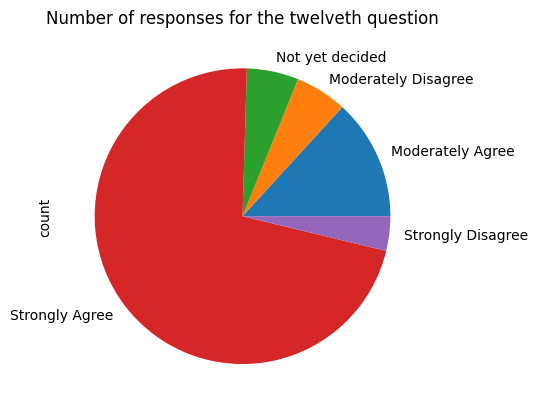

In [67]:
plot12 = final_df[' Do you agree that regular practice of Mathematics can solve the problems related to Math phobia'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the twelveth question')

In [68]:
final_df[' Does breaking up a complicated problem into smaller part help in betterment'].value_counts().sort_index()

 Does breaking up a complicated problem into smaller part help in betterment
Moderately Agree       22
Moderately Disagree     4
Not yet decided        10
Sometimes               3
Strongly Agree         56
Strongly Disagree       3
Yes                     7
never                   1
Name: count, dtype: int64

In [69]:
sen_ana_feed13 = final_df[' Does breaking up a complicated problem into smaller part help in betterment']
feedback_count = final_df[' Does breaking up a complicated problem into smaller part help in betterment'].value_counts()
sentiment_scores = {
    "Strongly Agree": 3,
    "Moderately Agree": 2,
    "Not yet decided": 0,
    "Moderately Disagree": -2,
    "Strongly Disagree": -3,
    "Sometimes": 0,
    "Yes": 1,
    "never": -1 
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed13.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print(" Does breaking up a complicated problem into smaller part help in betterment")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Does breaking up a complicated problem into smaller part help in betterment
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0       Strongly Agree     56                3               1.584906
1     Moderately Agree     22                2               0.415094
2      Not yet decided     10                0               0.000000
3                  Yes      7                1               0.066038
4  Moderately Disagree      4               -2              -0.075472
5    Strongly Disagree      3               -3              -0.084906
6            Sometimes      3                0               0.000000
7                never      1               -1              -0.009434
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 1.8962264150943395


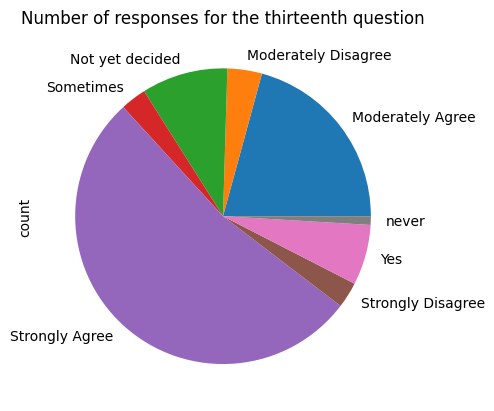

In [70]:
plot13 = final_df[' Does breaking up a complicated problem into smaller part help in betterment'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the thirteenth question')

In [71]:
final_df[' Does studying in peer groups and seeking help from teacher help to eradicate Math phobia'].value_counts().sort_index()

 Does studying in peer groups and seeking help from teacher help to eradicate Math phobia
Moderately Agree        3
Moderately Disagree     1
Sometimes              34
Strongly Disagree       2
Yes                    56
never                   5
Name: count, dtype: int64

In [72]:
sen_ana_feed14 = final_df[' Does studying in peer groups and seeking help from teacher help to eradicate Math phobia']
feedback_count = final_df[' Does studying in peer groups and seeking help from teacher help to eradicate Math phobia'].value_counts()
sentiment_scores = {
    "Moderately Agree": 3,
    "Moderately Disagree": -1,
    "Sometimes": 2,
    "Strongly Disagree": -2,
    "Yes": 1,
    "never": -3
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed14.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']/sum(feedback_count.values)

print(" Does studying in peer groups and seeking help from teacher help to eradicate Math phobia")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Does studying in peer groups and seeking help from teacher help to eradicate Math phobia
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0                  Yes     56                1               0.554455
1            Sometimes     34                2               0.673267
2                never      5               -3              -0.148515
3     Moderately Agree      3                3               0.089109
4    Strongly Disagree      2               -2              -0.039604
5  Moderately Disagree      1               -1              -0.009901
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 1.118811881188119


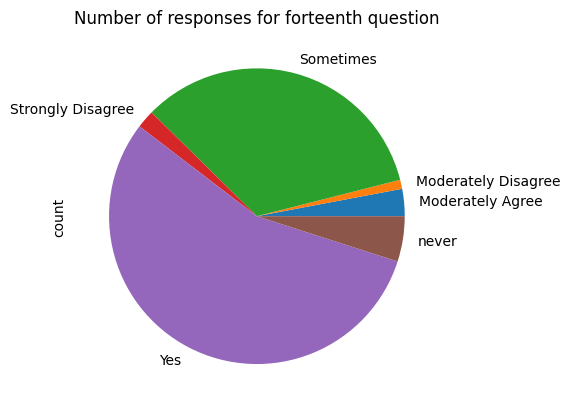

In [73]:
plot14 = final_df[' Does studying in peer groups and seeking help from teacher help to eradicate Math phobia'].value_counts().sort_index().plot(kind='pie', title='Number of responses for forteenth question')

In [74]:
final_df[' Does frequent mock tests help to release the pressure'].value_counts().sort_index()

 Does frequent mock tests help to release the pressure
Moderately Agree       28
Moderately Disagree     9
Not yet decided         7
Strongly Disagree       8
Name: count, dtype: int64

In [75]:
sen_ana_feed15 = final_df[' Does frequent mock tests help to release the pressure']
feedback_count = final_df[' Does frequent mock tests help to release the pressure'].value_counts()
sentiment_scores = {
    "Moderately Agree": 1,
    "Not yet decided": 0,
    "Moderately Disagree": -1,
    "Strongly Disagree": -2
}

sentiment_score_df = pd.DataFrame({
    'feedback': feedback_count.index,
    'count': feedback_count.values 
})

final_df['sentiment_score'] = sen_ana_feed15.map(sentiment_scores)
sentiment_score_df['sentiment_score'] = sentiment_score_df['feedback'].map(sentiment_scores)/sum(feedback_count.values)

# Calculate the average sentiment score
average_sentiment_score = final_df['sentiment_score'].mean()
sentiment_score_df['total_sentiment_score'] = sentiment_score_df['count'] * sentiment_score_df['sentiment_score']

print(" Does frequent mock tests help to release the pressure")
print('----------------------------------------------------------------------------------------------------------------------')
print(sentiment_score_df)
print('----------------------------------------------------------------------------------------------------------------------')
print("The average sentiment score is:", average_sentiment_score)

 Does frequent mock tests help to release the pressure
----------------------------------------------------------------------------------------------------------------------
              feedback  count  sentiment_score  total_sentiment_score
0     Moderately Agree     28         0.019231               0.538462
1  Moderately Disagree      9        -0.019231              -0.173077
2    Strongly Disagree      8        -0.038462              -0.307692
3      Not yet decided      7         0.000000               0.000000
----------------------------------------------------------------------------------------------------------------------
The average sentiment score is: 0.057692307692307696


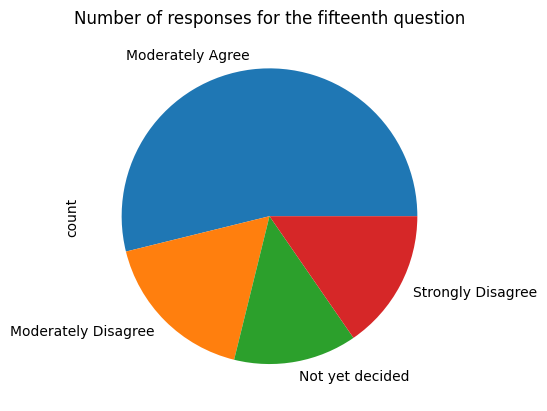

In [76]:
plot15 = final_df[' Does frequent mock tests help to release the pressure'].value_counts().sort_index().plot(kind='pie', title='Number of responses for the fifteenth question')

In [77]:
from textblob import TextBlob

def analyze_sentiment(final_df, row_index):
    sentiments = []
    for question in final_df.columns:
        feedback = str(final_df.loc[row_index, question])
        sentiment = TextBlob(feedback).sentiment.polarity
        sentiments.append(sentiment)
    return sentiments


In [78]:
row_index = 17 # change this to the index of the row you want to analyze
sentiments = analyze_sentiment(final_df, row_index)
res = sum(sentiments)/15
if 0<= res <=0.12:
    print("Confident")
else:
    print("Under-Confident")

print("Sttudent sentiment analysis score:",res)

Confident
Sttudent sentiment analysis score: 0.11555555555555555
